###  Initial Insights from the Dataset
- #### Dataset has employee details of a company
- #### The aim is to predict the attrition and also factors responsible for attrition
- #### Target is Present - We'll use Supervised Learning Mechanisms
- #### Target is Binary 
        - We'll use Classification Algorithms - DecisionTree,RandomForest
        - Also the business wants to know which factor is affecting attrition 
                - So we try to use Decision Tree for better Explainability also try Random Forest with variable importance

#### Steps
1. Load The Dataset
2. Explore Dataset
    - Check for correlation
    - We are using classification algorithms - outliers are not much a problem,but check for outliers in continuous variables
    - Check for zero variance features and drop if found
    - Check for duplicates
    - Treat Null Values(Drop or Replace)
3. One Hot Encoding
4. Modelling
5. Evaluate Performance
6. Predict on Test Data
7. Final Submission
    

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('HR_Employee_Attrition_Data.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})

## Quick EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   int64 
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

### Checking for Class Imbalance

In [6]:
df['Attrition'].value_counts()

0    2466
1     474
Name: Attrition, dtype: int64

In [7]:
## Clearly there is class imbalance in the dataset
## We'll use smote technique to balance the data

### Data has zero Null Values

In [7]:
# Checking for duplicate rows
duplicate = df[df.duplicated()]
duplicate

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [8]:
df['PercentSalaryHike'].head()

0    11
1    23
2    15
3    11
4    12
Name: PercentSalaryHike, dtype: int64

In [9]:
df['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
2935    0
2936    0
2937    0
2938    0
2939    0
Name: Attrition, Length: 2940, dtype: int64

In [71]:
#Pandas Profiling
profile = ProfileReport(df)
profile.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Checking For Correlations

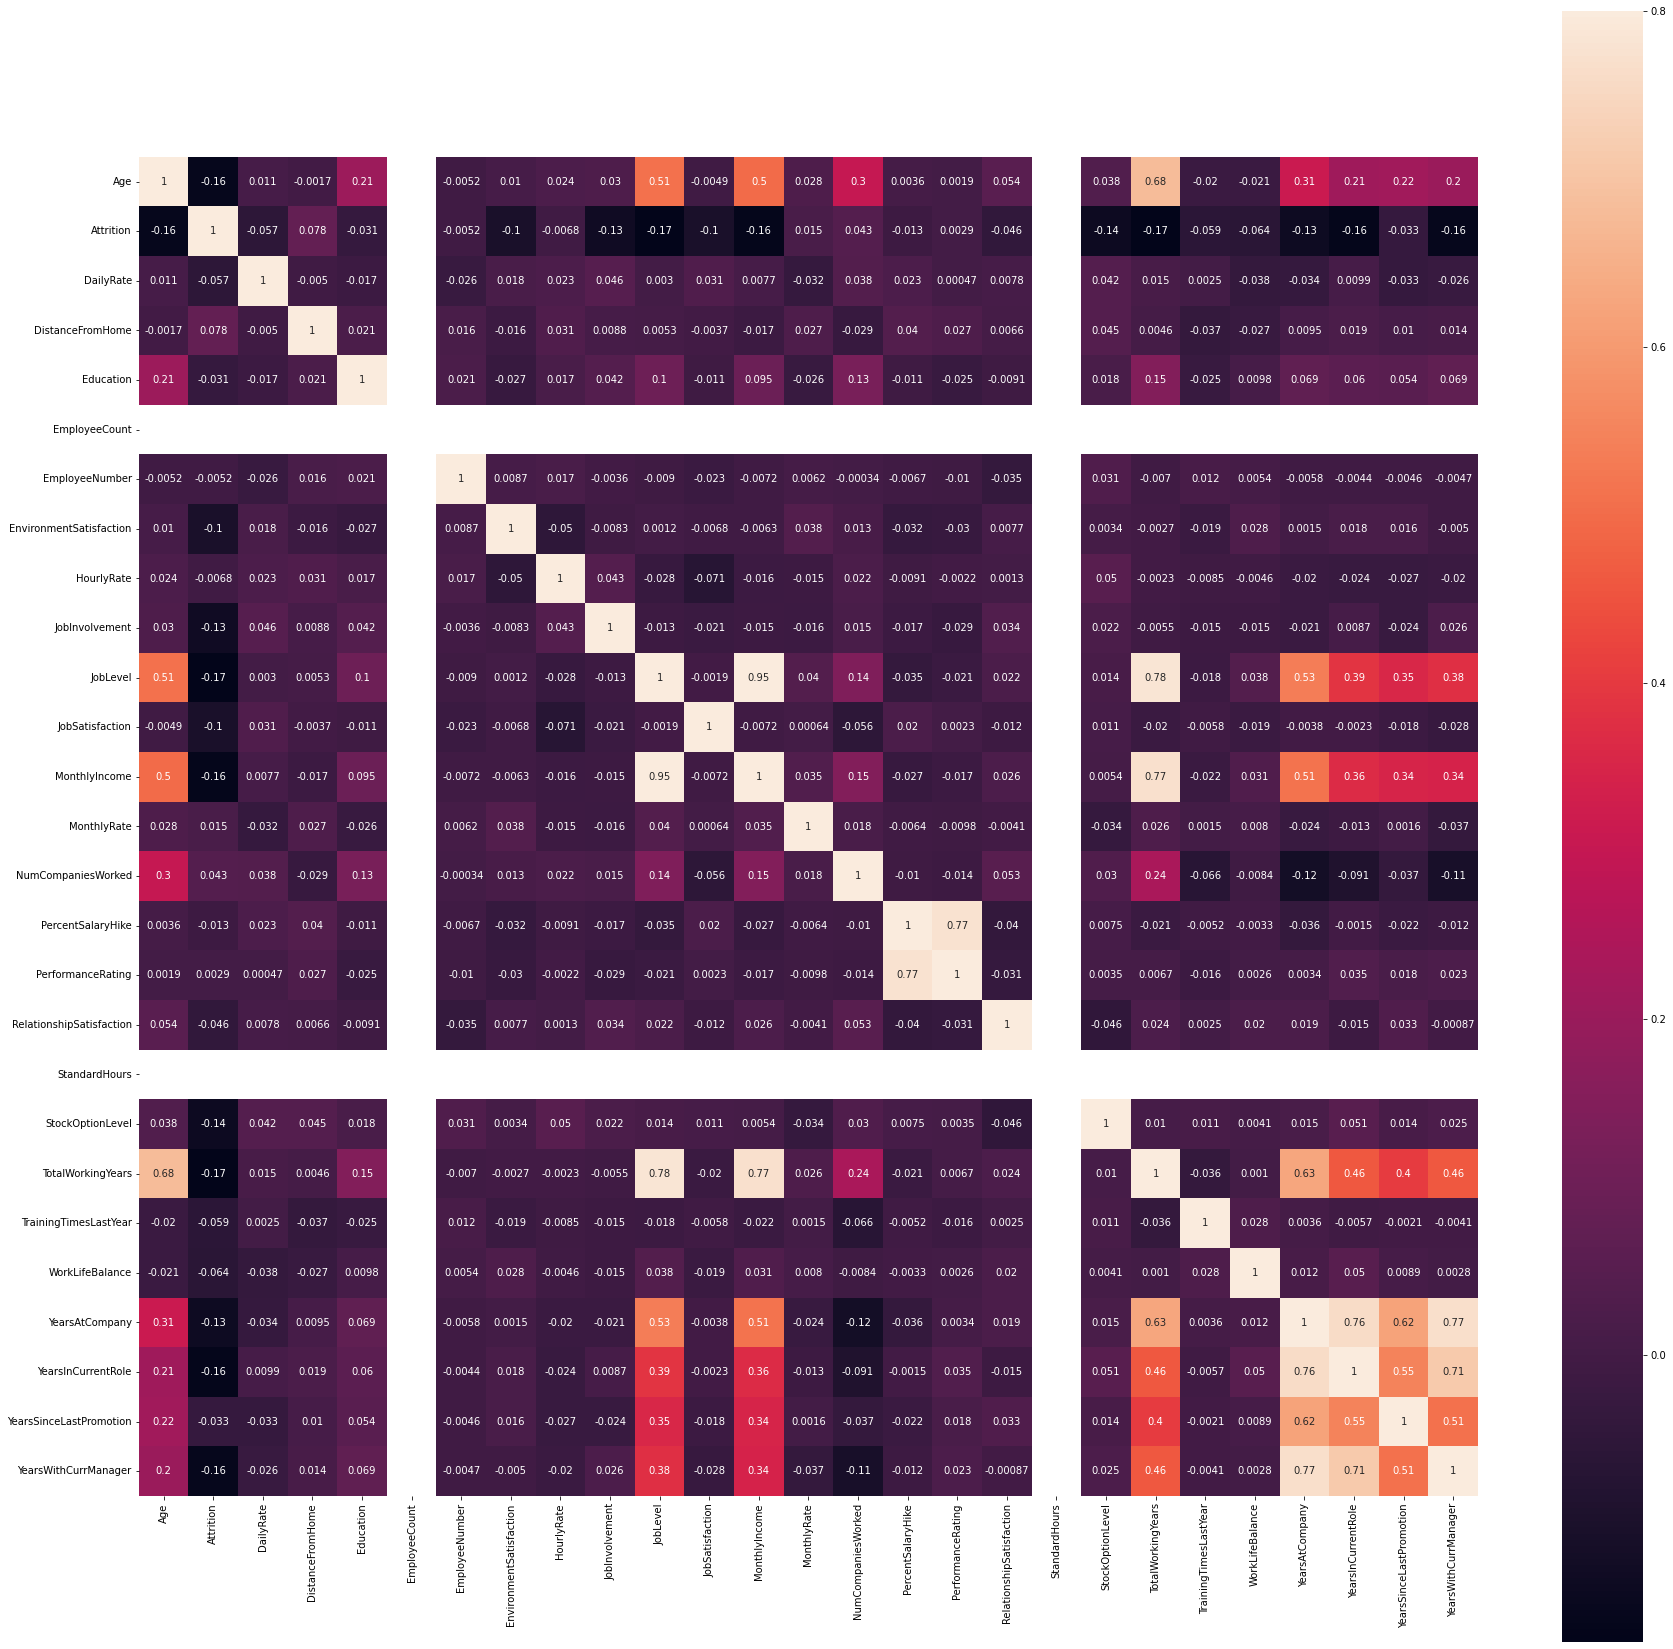

In [63]:
corrmat = df.corr()
# print(corrmat)
plt.figure(figsize=(30,30))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

In [8]:
# CoRelated Columns
# TotalWorkingYears - JobLevel        0.78 
# TotalWorkingYears - MonthlyIncome   0.77
# MonthlyIncome     - JobLevel        0.95
# YearsInCurrentRole - YearsAtCompany 0.76
# YearsWithCurrManager-YearsAtCompany 0.77

In [9]:
def preprocessing(df):
    #Dropping Zero variance columns
    df.drop('EmployeeCount',axis=1,inplace=True)
    df.drop('Over18',axis=1,inplace=True)
    df.drop('StandardHours',axis=1,inplace=True)
    #Dropping Non-relevent Columns
    df.drop('EmployeeNumber',axis=1,inplace=True)
    #Dropping Correlated Columns
    df.drop('MonthlyIncome',axis=1,inplace=True)
    df.drop('TotalWorkingYears',axis=1,inplace=True)
    df.drop('YearsInCurrentRole',axis=1,inplace=True)
    df.drop('YearsWithCurrManager',axis=1,inplace=True)
    
    
    # return data 

In [10]:
#Making a copy of original dataset
copy_df = df.copy()

In [11]:
copy_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [12]:
#Calling the preprocessing function to do preprocessing
preprocessing(copy_df)

In [13]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   int64 
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EnvironmentSatisfaction   2940 non-null   int64 
 9   Gender                    2940 non-null   object
 10  HourlyRate                2940 non-null   int64 
 11  JobInvolvement            2940 non-null   int64 
 12  JobLevel                  2940 non-null   int64 
 13  JobRole                   2940 non-null   object
 14  JobSatisfaction         

In [14]:
copy_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsSinceLastPromotion'],
      dtype='object')

## Modelling

- Feature and Target Values - x,y
- One Hot Encode categorical features
- Train Test Split
- Train on Classification Algorithms

In [15]:
copy_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,8,Yes,11,3,1,0,0,1,6,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,No,23,4,4,1,3,3,10,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,6,Yes,15,3,2,0,3,3,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,1,Yes,11,3,3,0,3,3,8,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,9,No,12,3,4,1,3,3,2,2


In [16]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [17]:
#Creating feature and target column
x = copy_df.drop('Attrition',axis=1)
#One Hot Encoding Categorical Variables
x = pd.get_dummies(x)
#Creating Target Column
y = copy_df['Attrition']

In [18]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,...,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,19479,...,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,24907,...,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2396,...,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,23159,...,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,16632,...,0,0,0,0,0,0,1,0,1,0


## Using SMOTE to handle Class Imbalance

In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

y_sm.value_counts()

1    2466
0    2466
Name: Attrition, dtype: int64

In [20]:
feature = x.columns
target = ['AttritionYes','AttritionNo']

### Train Test Split

In [22]:
#Creating Training and Testing Partition
x_train,x_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=0.3,random_state=42, stratify=y_sm)

In [22]:
x.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Di

In [23]:
x_train.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Di

In [23]:
x_train.shape

(3452, 47)

In [24]:
y_train.shape

(3452,)

# Decision Tree Algorithm

In [25]:
#Using Decision Tree algorithm for Model Explainability
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

## Hyperparameter Tuning Using GridSearchCV

In [26]:
fit_dtree = DecisionTreeClassifier(random_state=42)

In [27]:
fit_dtree = DecisionTreeClassifier(random_state=42)

parameter_list = {
    'max_depth' : [10,12,15,20,25,30,35,40,50],
    'criterion' : ['gini'],
    'min_samples_split' : [2,3,4,6,8,10,12,15,20,25,30,35,40],
    
}

cv_dtree = GridSearchCV(fit_dtree, cv=10, param_grid = parameter_list)

cv_dtree.fit(x_train, y_train)

print('Best Parameters using grid search: \n', cv_dtree.best_params_)


Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 2}


### Setting the best parameters 

In [28]:
fit_dtree.set_params(criterion='gini', 
                     max_depth = 25, 
                     min_samples_split = 2)

DecisionTreeClassifier(max_depth=25, random_state=42)

### Training the model

In [29]:
fit_dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=25, random_state=42)

### Predictions

In [30]:
predictions = fit_dtree.predict(x_test)
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Accuracy

In [31]:
train_accuracy = fit_dtree.score(x_train,y_train)
print("Here is our mean accuracy on the training set:\n {0:.3f}"\
      .format(train_accuracy))
test_accuracy = fit_dtree.score(x_test,y_test)
print("Here is our mean accuracy on the testing set:\n {0:.3f}"\
      .format(test_accuracy))

Here is our mean accuracy on the training set:
 1.000
Here is our mean accuracy on the testing set:
 0.969


### Error Rate

In [32]:
# Here we calculate the test error rate!
test_error_rate_rf = 1 - test_accuracy
print("The test error rate for our model is:\n {0: .4f}"\
      .format(test_error_rate_rf))

The test error rate for our model is:
  0.0311


### Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test, predictions))

[[714  26]
 [ 20 720]]


In [34]:
def create_conf_mat(test_class_set, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(test_class_set.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (test_class_set.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = test_class_set,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

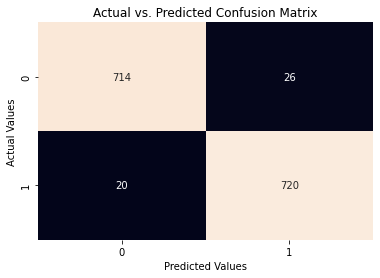

In [35]:
conf_mat = create_conf_mat(y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## Evaluate Performance on Test Partition

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [37]:
# Evaluate Performance of the Model
accuracy = accuracy_score(y_test,predictions)
precision = precision_score(y_test,predictions)
recall = recall_score(y_test,predictions)
print(f'Metrics for Decison Tree : accuracy- {accuracy}, recall- {recall}, precision- {precision}')

Metrics for Decison Tree : accuracy- 0.9689189189189189, recall- 0.972972972972973, precision- 0.9651474530831099


## Area Under the Curve

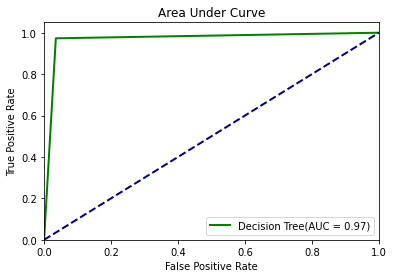

In [38]:
from sklearn.metrics import roc_curve, auc

fpr_dt, tpr_dt, _ = roc_curve(y_test, predictions)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

### Variable Importance

In [39]:
#let's create a dictionary of features and their importance values
feat_dict= {}
for col, val in sorted(zip(x_train.columns, fit_dtree.feature_importances_),key=lambda x:x[1],reverse=True):
    feat_dict[col]=val

#Creating a Dataframe
feat_df = pd.DataFrame({'Feature':feat_dict.keys(),'Importance':feat_dict.values()})

feat_df

,Feature,Importance
0,OverTime_No,0.240558
1,JobLevel,0.071374
2,Age,0.056974
3,YearsAtCompany,0.049320
4,DistanceFromHome,0.048834
5,OverTime_Yes,0.048025
6,StockOptionLevel,0.046793
7,Department_Research & Development,0.044262
8,RelationshipSatisfaction,0.039993
9,DailyRate,0.033612


## Factors Affecting the Attrition - Decision Tree Model 

1. OverTime_No
2. JobLevel
3. Age
4. YearsAtCompany
5. DistanceFromHome
6. OverTime_Yes
7. StockOptionLevel
8. Department_Research & Development
9. RelationshipSatisfaction
10. DailyRate
11. JobSatisfaction

## Visualizing Decision Tree

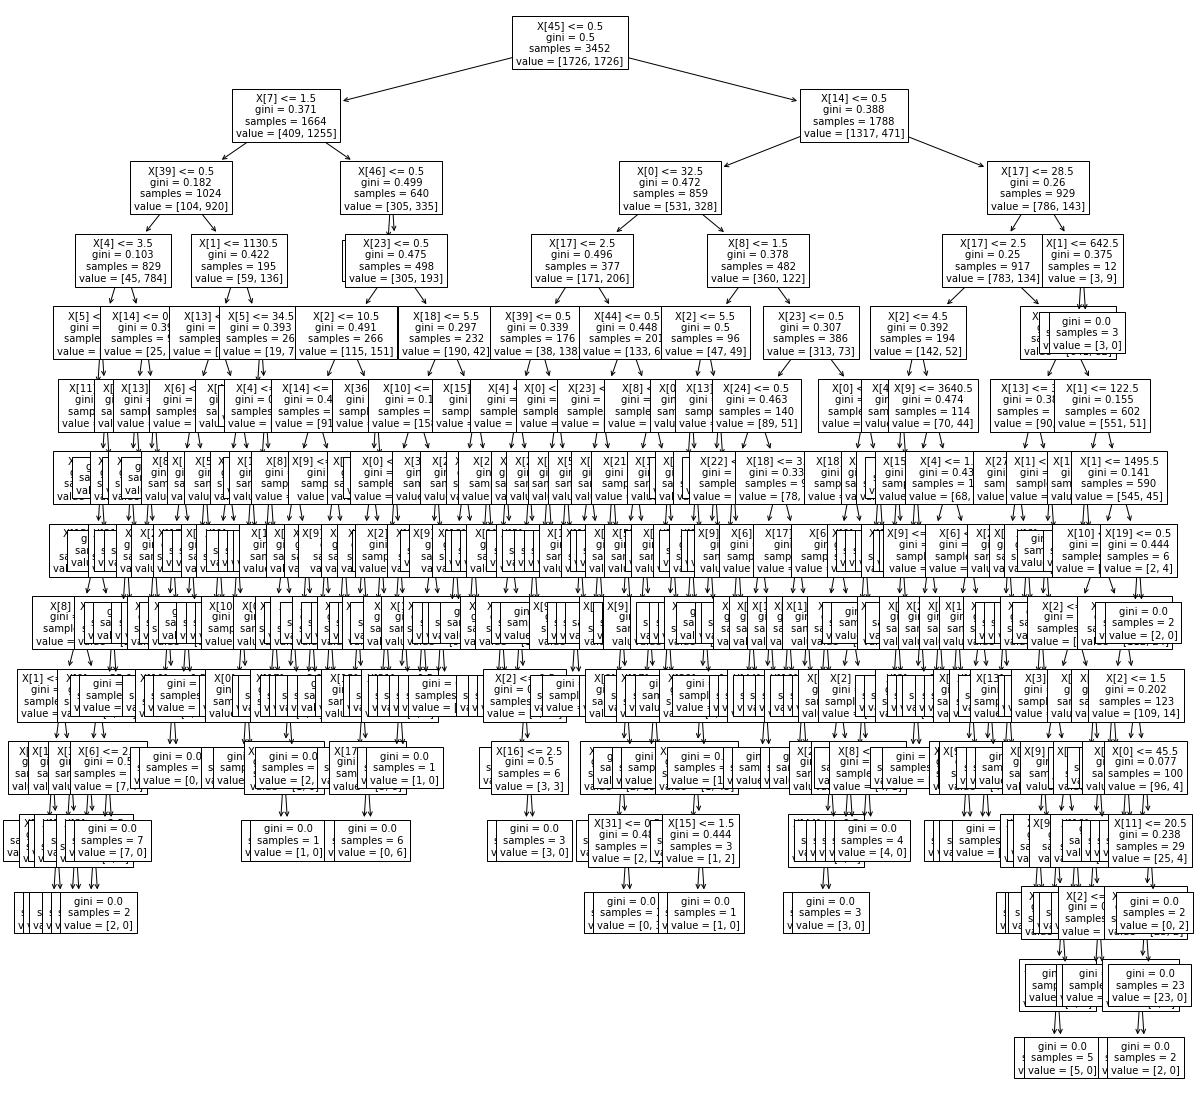

In [40]:
from sklearn.tree import plot_tree
plot_rows =1
plot_cols = 1

fig, ax1 = plt.subplots(nrows = plot_rows,ncols=plot_cols,figsize = (20,20))

plot_tree(fit_dtree,ax=ax1,fontsize=10)
plt.show()

In [41]:
fig.savefig("decision_tree.png")

# Random Forest Algorithm

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
# Set the random state for reproducibility
fit_rf = RandomForestClassifier(random_state=42)

## Hyper-Parameter Optimization using GridSearchCV

In [44]:
np.random.seed(42)


param_dist = {'max_depth': [2,3,4,8,12,16,30,50,70,100,200],
              'criterion': ['gini', 'entropy']
              }

cv_rf = GridSearchCV(fit_rf, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 3)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)


Best Parameters using grid search: 
 {'criterion': 'entropy', 'max_depth': 30}


In [45]:
# Set best parameters given by grid search 
fit_rf.set_params(criterion = 'entropy', 
                  max_depth = 30)

RandomForestClassifier(criterion='entropy', max_depth=30, random_state=42)

## OOB Rate

In [46]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(x_train, y_train)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


In [47]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

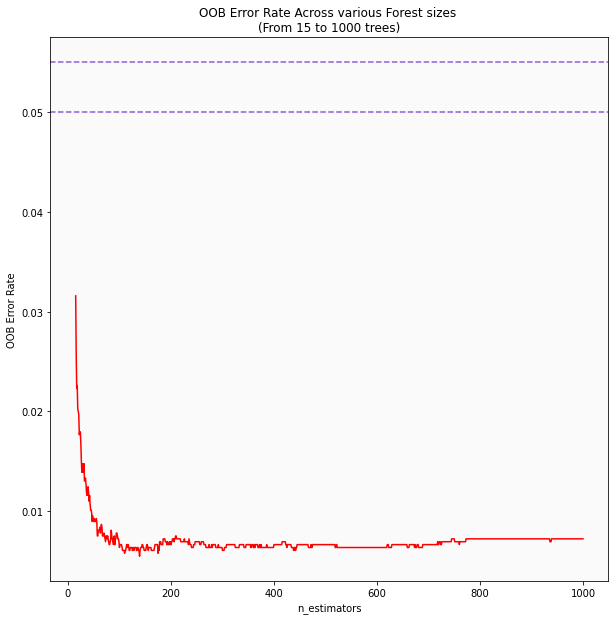

In [48]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',color = 'red')
plt.axhline(0.055, color='#875FDB',linestyle='--')
plt.axhline(0.05, color='#875FDB',linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [49]:
# Choosing n_estimators as 500 from OOB Rate

In [50]:
# Refine the tree via OOB Output
fit_rf.set_params(n_estimators=500,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=500,
                       random_state=42)

# Train the RandomForest

In [51]:
fit_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=500,
                       random_state=42)

## Variable Importance

In [52]:
def variable_importance(fit):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fit.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [53]:
var_imp_rf = variable_importance(fit_rf)

importances_rf = var_imp_rf['importance']

indices_rf = var_imp_rf['index']

In [54]:
def print_var_importance(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        i = f
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      names_index[indices[i]],
                      importance[indices[f]]))

In [55]:
names_index = x.columns
names_index

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsSinceLastPromotion',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Di

In [56]:
print_var_importance(importances_rf, indices_rf, names_index)

Feature ranking:
1. The feature 'OverTime_No' has a Mean Decrease in Impurity of 0.09710
2. The feature 'JobLevel' has a Mean Decrease in Impurity of 0.05753
3. The feature 'Age' has a Mean Decrease in Impurity of 0.04817
4. The feature 'StockOptionLevel' has a Mean Decrease in Impurity of 0.04442
5. The feature 'MonthlyRate' has a Mean Decrease in Impurity of 0.04434
6. The feature 'DailyRate' has a Mean Decrease in Impurity of 0.04422
7. The feature 'YearsAtCompany' has a Mean Decrease in Impurity of 0.04314
8. The feature 'HourlyRate' has a Mean Decrease in Impurity of 0.03883
9. The feature 'DistanceFromHome' has a Mean Decrease in Impurity of 0.03759
10. The feature 'JobSatisfaction' has a Mean Decrease in Impurity of 0.03574
11. The feature 'EnvironmentSatisfaction' has a Mean Decrease in Impurity of 0.03244
12. The feature 'JobInvolvement' has a Mean Decrease in Impurity of 0.02993
13. The feature 'Department_Research & Development' has a Mean Decrease in Impurity of 0.02972
14.

In [57]:
def variable_importance_plot(importance, indices, name_index):
    """
    Purpose
    ----------
    Prints bar chart detailing variable importance for CART model
    NOTE: feature_space list was created because the bar chart
    was transposed and index would be in incorrect order.

    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns:
    ----------
    Returns variable importance plot in descending order
    """
    index = np.arange(len(names_index))

    importance_desc = sorted(importance)
    feature_space = []
    for i in range(indices.shape[0] - 1, -1, -1):
        feature_space.append(names_index[indices[i]])

    fig, ax = plt.subplots(figsize=(10, 10))

    # ax.set_axis_bgcolor('#fafafa')
    plt.title('Feature importances for Random Forest Model\
    \nEmployee Attrition')
    plt.barh(index,
             importance_desc,
             align="center",
             color = '#875FDB')
    plt.yticks(index,
               feature_space)

    plt.ylim(-1, 30)
    plt.xlim(0, max(importance_desc) + 0.01)
    plt.xlabel('Mean Decrease in Impurity')
    plt.ylabel('Feature')

    plt.show()
    plt.close()

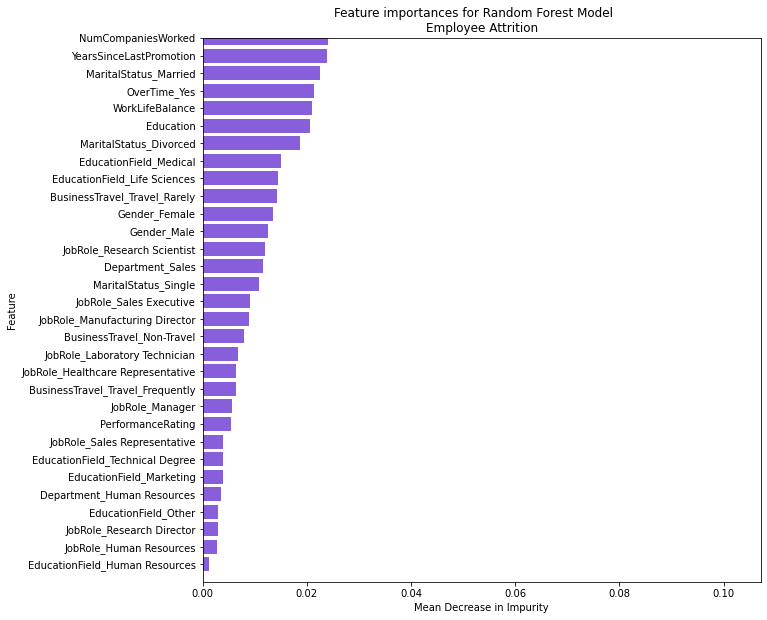

In [58]:
variable_importance_plot(importances_rf, indices_rf, names_index)

## Predictions

In [59]:
predictions_rf = fit_rf.predict(x_test)

## Confusion Matrix

In [60]:
def create_conf_mat(y_test, predictions):
    """Function returns confusion matrix comparing two arrays"""
    if (len(y_test.shape) != len(predictions.shape) == 1):
        return print('Arrays entered are not 1-D.\nPlease enter the correctly sized sets.')
    elif (y_test.shape != predictions.shape):
        return print('Number of values inside the Arrays are not equal to each other.\nPlease make sure the array has the same number of instances.')
    else:
        # Set Metrics
        test_crosstb_comp = pd.crosstab(index = y_test,
                                        columns = predictions)
        # Changed for Future deprecation of as_matrix
        test_crosstb = test_crosstb_comp.values
        return test_crosstb

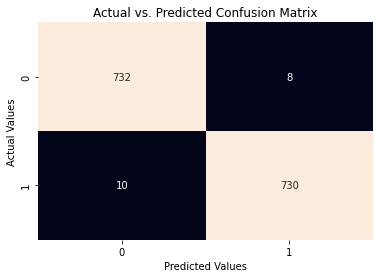

In [61]:
conf_mat = create_conf_mat(y_test, predictions_rf)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

## Accuracy

In [62]:
train_accuracy = fit_rf.score(x_train,y_train)
print("Here is our mean accuracy on the training set:\n {0:.3f}"\
      .format(train_accuracy))
test_accuracy = fit_rf.score(x_test,y_test)
print("Here is our mean accuracy on the testing set:\n {0:.3f}"\
      .format(test_accuracy))

Here is our mean accuracy on the training set:
 1.000
Here is our mean accuracy on the testing set:
 0.988


## Area Under Curve (AUC)

In [63]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob = fit_rf.predict_proba(x_test)[:, 1]

fpr2, tpr2, _ = roc_curve(y_test,
                          predictions_prob,
                          pos_label = 1)

In [64]:
auc_rf = auc(fpr2, tpr2)

In [65]:
def plot_roc_curve(fpr, tpr, auc, estimator, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * estimator: String represenation of appropriate model, can only contain the
    following: ['knn', 'rf', 'nn']
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
    my_estimators = {'knn': ['Kth Nearest Neighbor', 'deeppink'],
              'rf': ['Random Forest', 'red'],
              'nn': ['Neural Network', 'purple']}

    try:
        plot_title = my_estimators[estimator][0]
        color_value = my_estimators[estimator][1]
    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color=color_value,
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format(plot_title, auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

C:\Users\Onkar\AppData\Local\Temp\ipykernel_8936\2153116955.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
C:\Users\Onkar\AppData\Local\Temp\ipykernel_8936\2153116955.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')


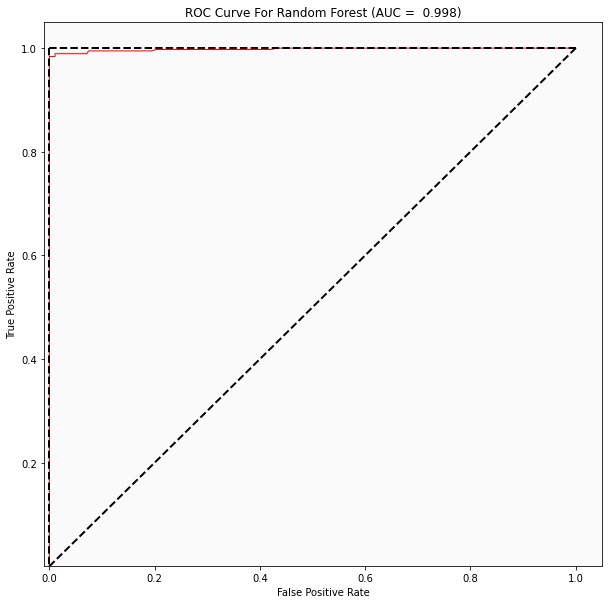

In [66]:
plot_roc_curve(fpr2, tpr2, auc_rf, 'rf',
               xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

## Classification Report

In [67]:
from sklearn.metrics import classification_report

In [68]:
dx = ['Attrition-No','Attrition-Yes']

In [69]:
def print_class_report(predictions, alg_name):
    """
    Purpose
    ----------
    Function helps automate the report generated by the
    sklearn package. Useful for multiple model comparison

    Parameters:
    ----------
    predictions: The predictions made by the algorithm used
    alg_name: String containing the name of the algorithm used
    
    Returns:
    ----------
    Returns classification report generated from sklearn. 
    """
    print('Classification Report for {0}:'.format(alg_name))
    print(classification_report(predictions, 
            y_test, 
            target_names = dx))

In [70]:
class_report = print_class_report(predictions_rf, 'Random Forest')

Classification Report for Random Forest:
               precision    recall  f1-score   support

 Attrition-No       0.99      0.99      0.99       742
Attrition-Yes       0.99      0.99      0.99       738

     accuracy                           0.99      1480
    macro avg       0.99      0.99      0.99      1480
 weighted avg       0.99      0.99      0.99      1480



# Conclusions

- Factors Affecting the Attrition - Decision Tree Model 
1. OverTime_No
2. JobLevel
3. Age
4. YearsAtCompany
5. DistanceFromHome
6. OverTime_Yes
7. StockOptionLevel
8. Department_Research & Development
9. RelationshipSatisfaction
10. DailyRate
11. JobSatisfaction


- From Variable Importance Important Factors associated with the Attrition - Random Forest
1. NumCompaniesWorked
2. YearsSinceLastPromotion
3. Marital_Status
4. Overtime
5. WorkLifeBalance
6. Education
7. Education Field
8. Business Travel
9. Gender
10. JobRole

### Random forest being a black box model its hard to relie on its results...Decision tree seems Promising
### We'll go with the results of Decision Tree